In [1]:
import pandas as pd
file=pd.read_csv('mnist_train.csv')
mnist=dict()
mnist['data']=file
mnist['target']=file['label']
del mnist['data']['label']
mnist['data']=mnist['data'].values
mnist['target']=mnist['target'].values
X,y=mnist['data'],mnist['target']
from sklearn.decomposition import PCA
pca=PCA(n_components=150)
X=pca.fit_transform(X)
X_train,y_train,X_test,y_test=X[:50000],y[:50000],X[100:],y[100:]
import numpy as np
shuffle_index=np.random.permutation(50000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]
print('done')

done


In [2]:
from sklearn.neighbors import KNeighborsClassifier as kn
from matplotlib import pyplot as plt
%matplotlib inline
knn_clf=kn()
X_train=X_train[:1000]
y_train=y_train[:1000]
X_train.shape

(1000, 150)

In [3]:
kn_clf=kn(weights='distance',n_neighbors=6,p=4)
grid_clf=kn_clf
print('start!')
import time
t1=time.time()
grid_clf.fit(X_train,y_train)
t2=time.time()
print(t2-t1,'seconds')

start!
0.011762857437133789 seconds


In [4]:
print(y_test[5],y_test[6])

1 6


start
done


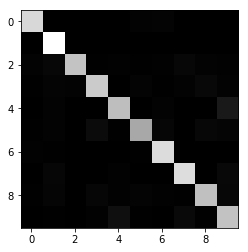

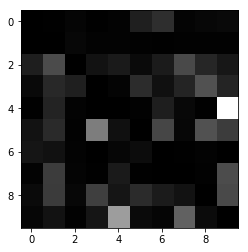

array([[5618,    4,   15,    4,    9,   82,  121,   13,   19,   25],
       [   0, 6655,   21,   11,    9,    6,    5,    8,    6,    7],
       [  81,  199, 5092,   50,   70,   27,   73,  194,  103,   63],
       [  26,  111,   87, 5290,   11,  124,   45,   99,  225,  102],
       [   5,   93,    8,    2, 4950,    6,   78,   21,    4,  664],
       [  45,  102,    7,  302,   39, 4388,  170,   18,  196,  149],
       [  57,   46,    8,    1,   17,   34, 5730,    3,    9,    2],
       [   9,  167,   12,    5,   74,    4,    0, 5766,    6,  212],
       [  26,  155,   20,  164,   55,  112,   72,   48, 4997,  194],
       [  18,   48,    6,   57,  415,   28,   15,  259,   31, 5061]])

In [5]:
print('start')
y_test_pred=grid_clf.predict(X_test)
print('done')
from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(y_test,y_test_pred)
new_cm=(cm_test/cm_test.sum(axis=1,keepdims=True))
np.fill_diagonal(new_cm,0)
plt.imshow(cm_test,cmap=plt.cm.gray)
plt.show()
plt.imshow(new_cm,cmap=plt.cm.gray)
plt.show()
cm_test

In [6]:
sum(y_test_pred==y_test)/len(y_test)

0.8939398998330551